In [4]:
import pandas as pd
import logging
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [5]:
# Read the CSV file
data = pd.read_csv('./data/creditcard.csv')

In [6]:
# Set up logging
logging.basicConfig(filename='./LogMonitor/data_cleaning.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [7]:
# Log the number of rows and columns in the original data
logging.info(f"Original data shape: {data.shape}")


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
logging.info(f"Missing values:\n{missing_values}")

In [9]:
# Normalize the Amount column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [10]:
# Remove outliers
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Amount'] >= Q1 - 1.5 * IQR) & (data['Amount'] <= Q3 + 1.5 * IQR)]


In [11]:
# Log the number of rows and columns after removing outliers
logging.info(f"Data shape after removing outliers: {data.shape}")


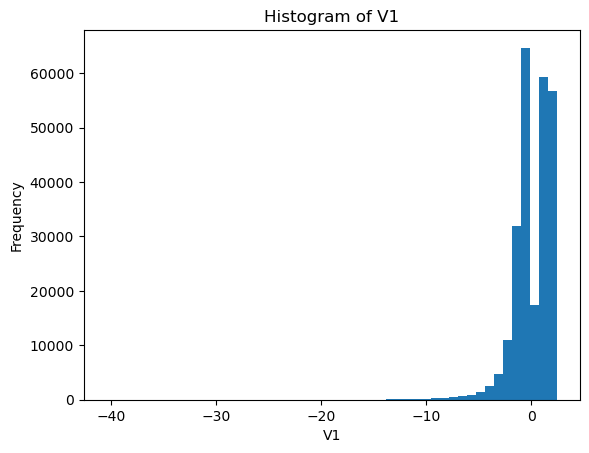

In [12]:
# Perform exploratory data analysis
plt.hist(data['V1'], bins=50)
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.title('Histogram of V1')
plt.show()

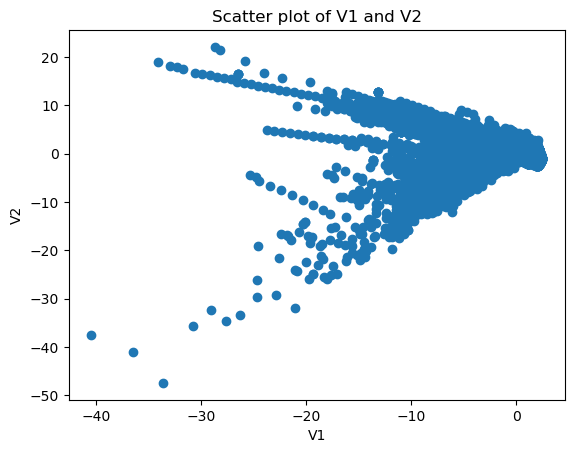

In [13]:

plt.scatter(data['V1'], data['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter plot of V1 and V2')
plt.show()

In [14]:
# Calculate time differences
data['Time_diff'] = data['Time'].diff()


In [15]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [16]:
# Log the number of rows and columns after removing duplicates
logging.info(f"Data shape after removing duplicates: {data.shape}")


In [17]:
# Save the cleaned data as a new CSV file
data.to_csv("CreditCleaned.csv", index=False)


In [18]:
# Log the completion message
logging.info("Data cleaning completed and cleaned data saved as CreditCleaned.csv")

Exploratory Data Analysis (EDA)


In [19]:
import seaborn as sns

# Univariate Analysis
def univariate_analysis(data):
    # Plotting the distribution of the Class variable
    sns.countplot(data['Class'])
    plt.title('Distribution of Class')
    plt.show()

    # Plotting histograms of numeric variables
    numeric_cols = ['Time'] + ['V'+str(i) for i in range(1, 29)] + ['Amount']
    for col in numeric_cols:
        plt.hist(data[col])
        plt.title(f'Distribution of {col}')
        plt.show()

In [20]:
# Bivariate Analysis
def bivariate_analysis(data):
    # Box plot comparing Class with numeric variables
    numeric_cols = ['Time'] + ['V'+str(i) for i in range(1, 29)] + ['Amount']
    for col in numeric_cols:
        sns.boxplot(x='Class', y=col, data=data)
        plt.title(f'Boxplot of {col} by Class')
        plt.show()

In [21]:
# Perform EDA
def perform_eda(data):
    print("Performing Univariate Analysis:")
    univariate_analysis(data)

    print("\nPerforming Bivariate Analysis:")
    bivariate_analysis(data)


Performing Univariate Analysis:


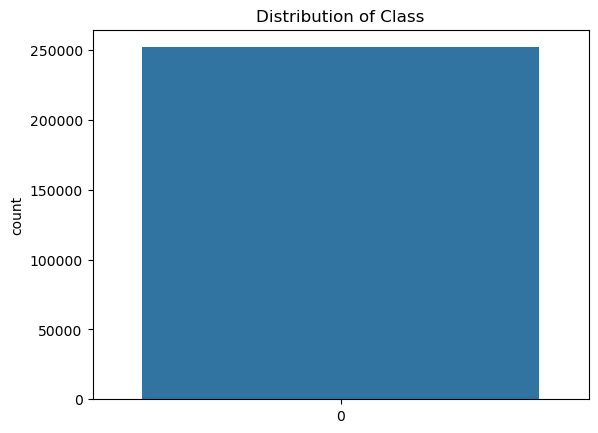

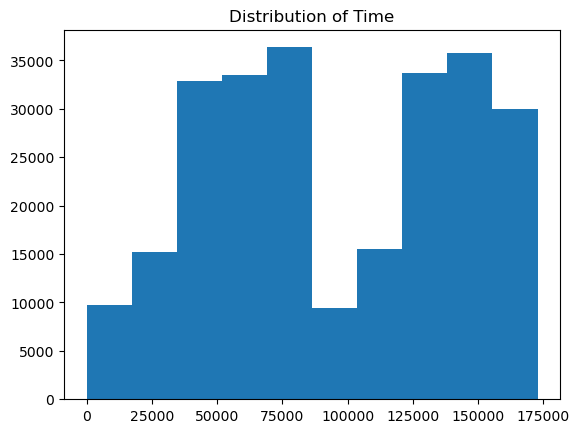

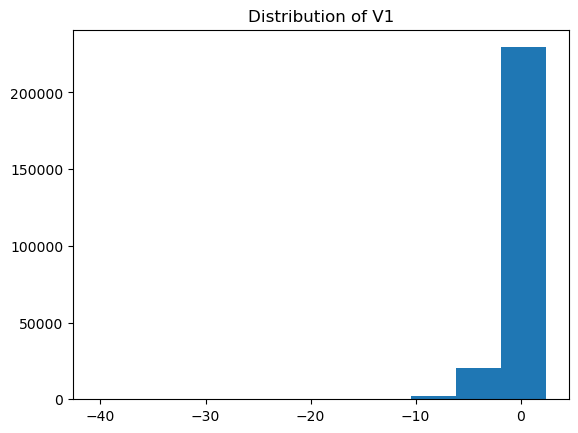

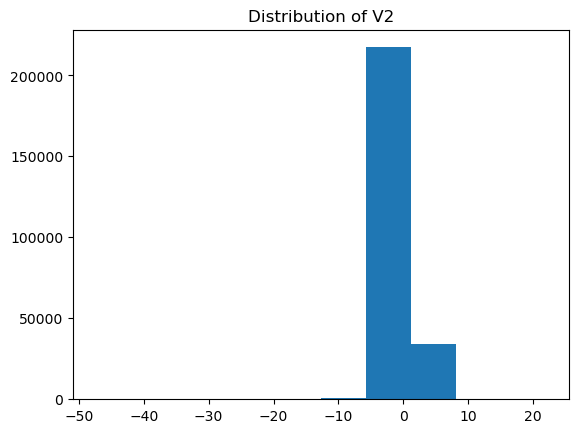

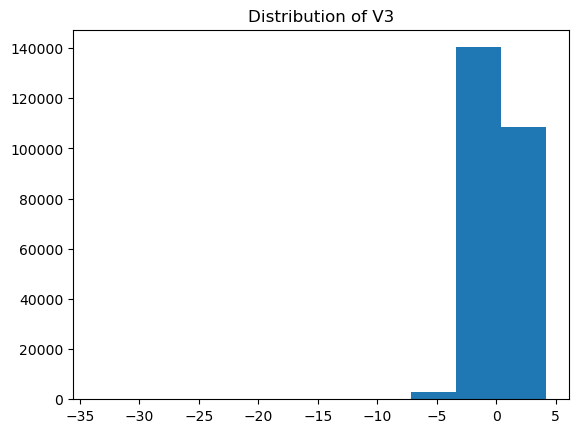

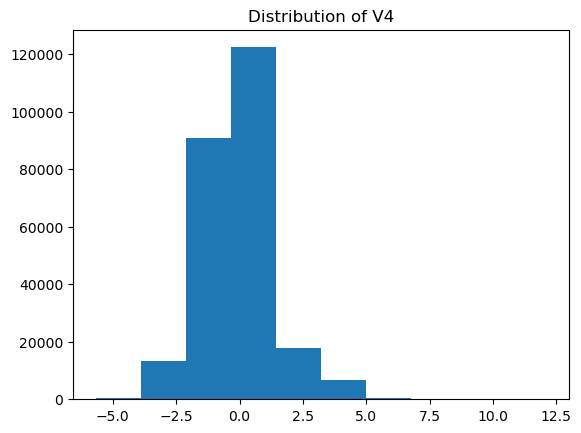

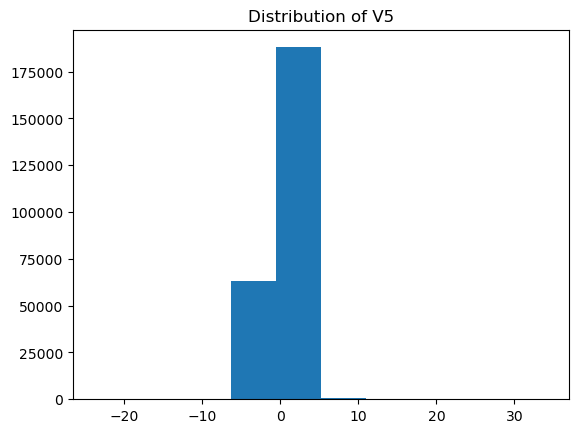

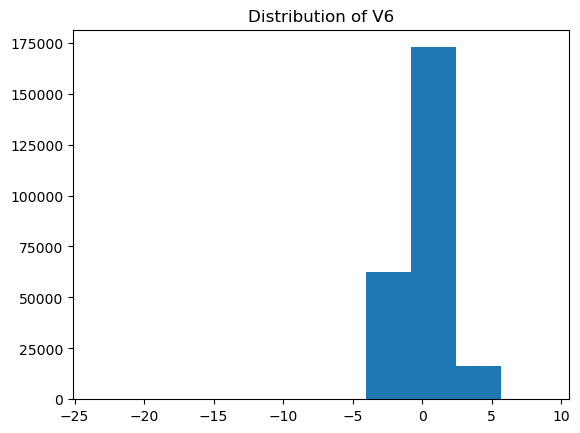

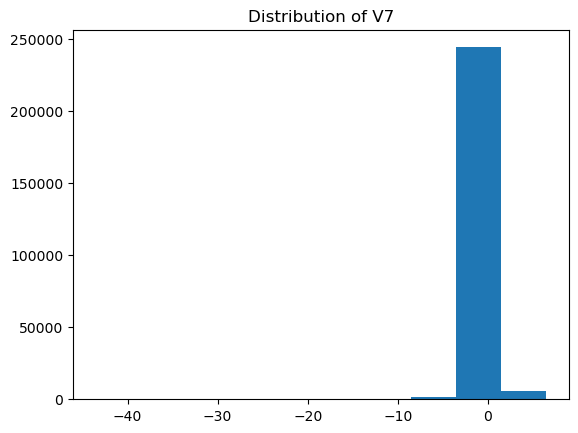

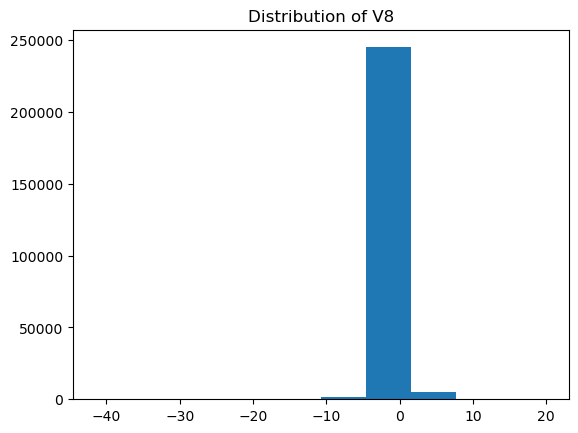

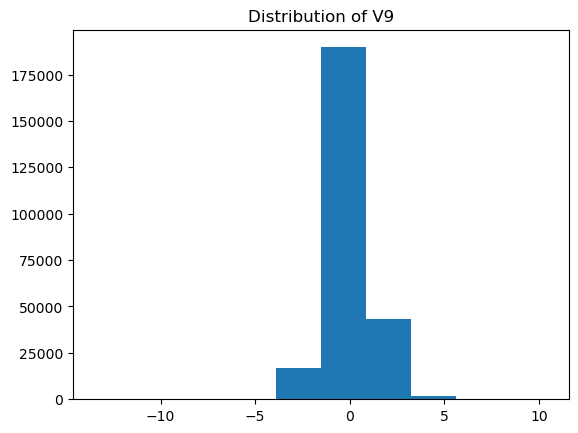

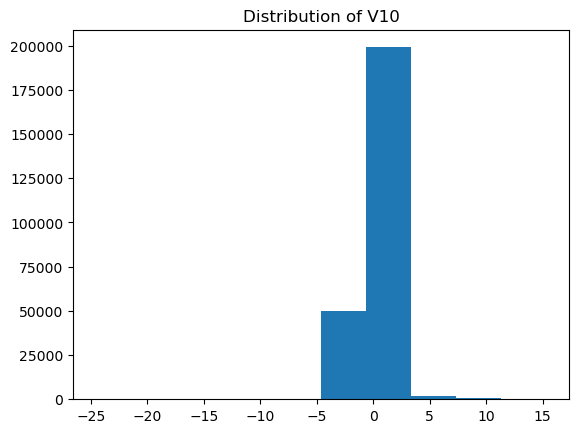

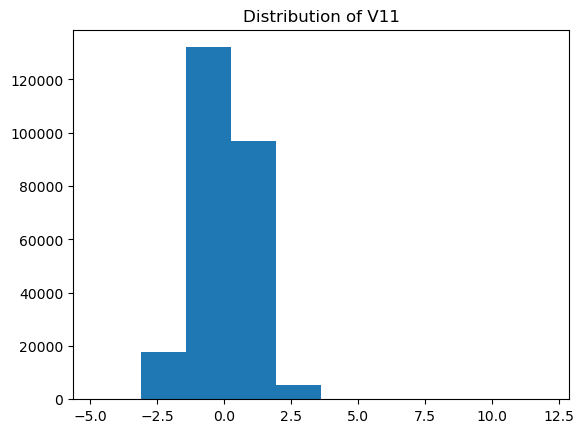

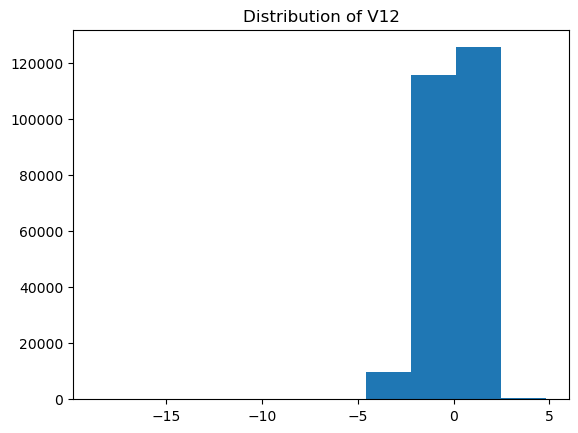

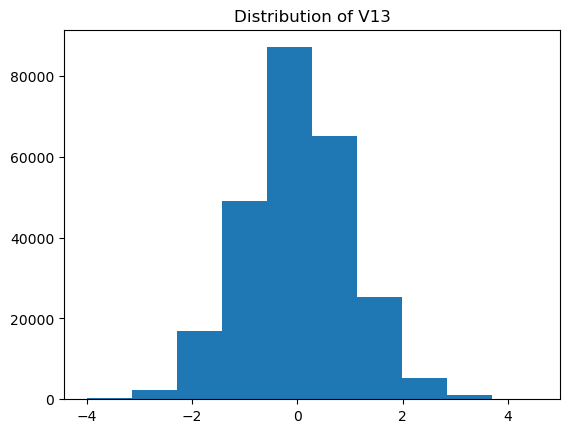

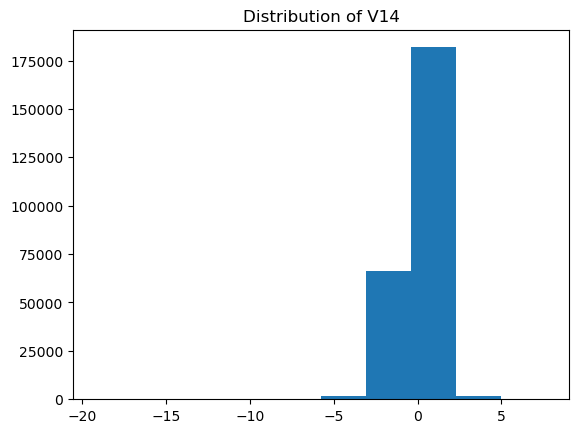

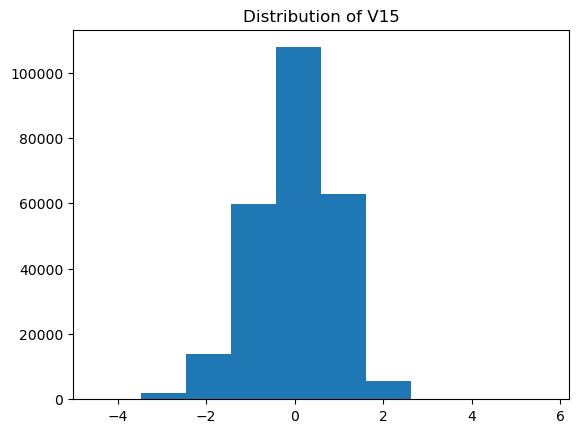

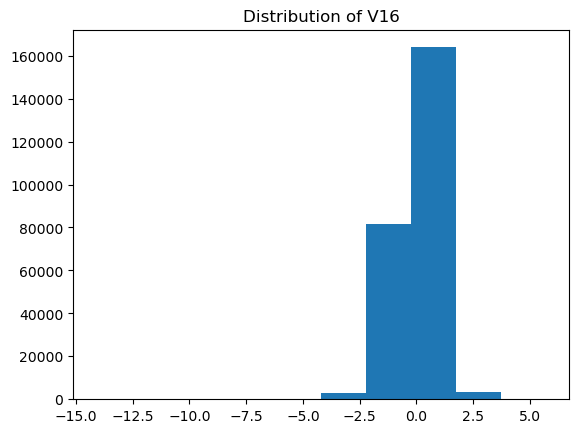

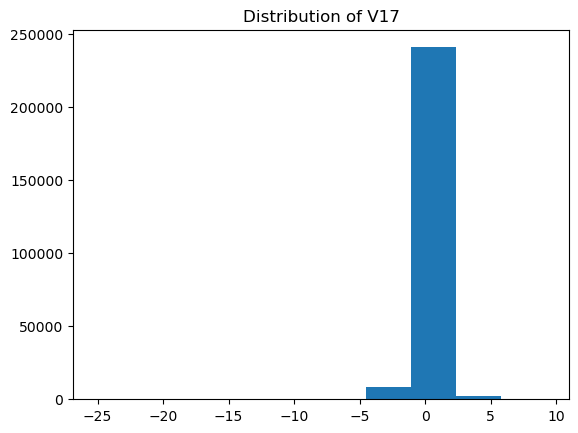

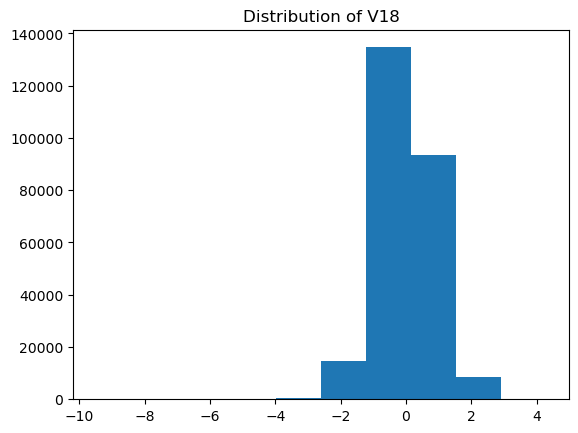

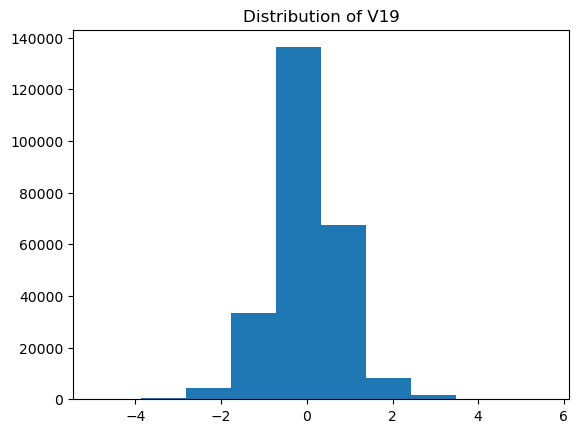

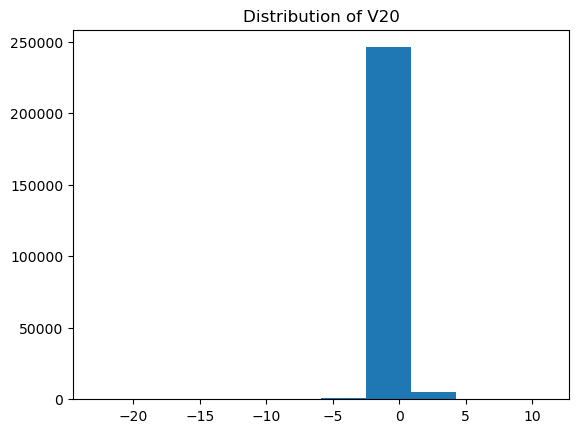

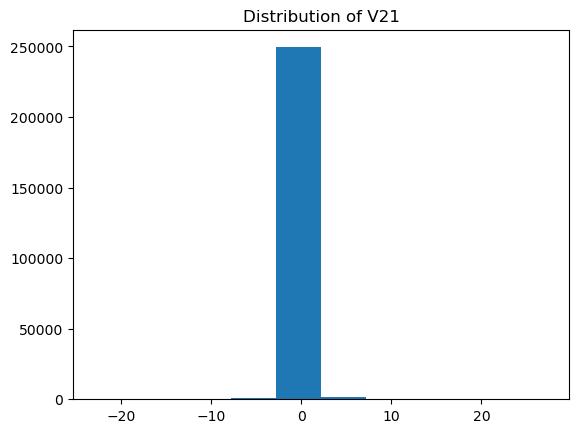

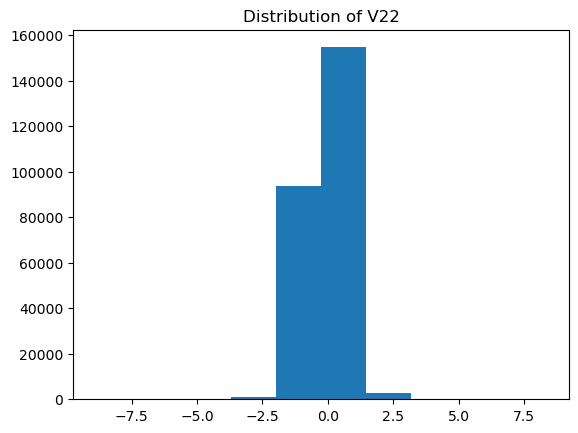

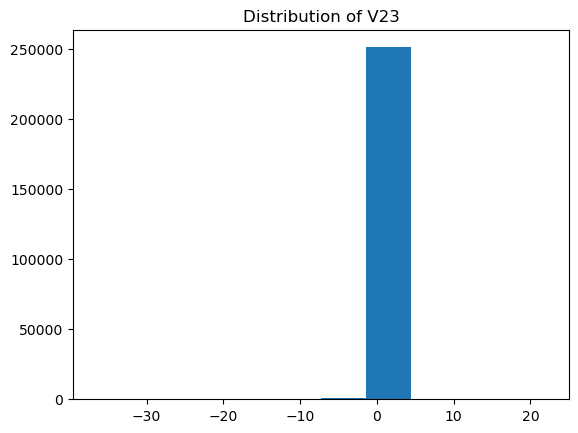

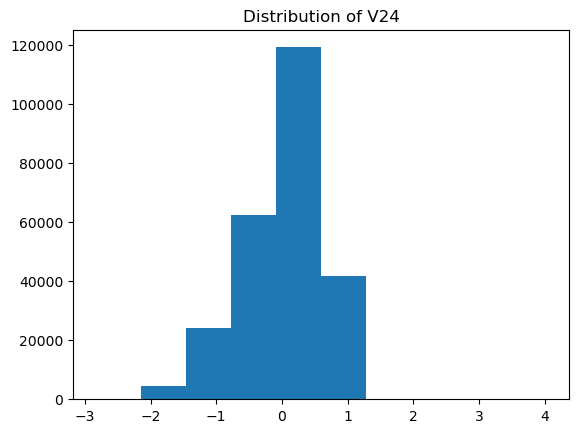

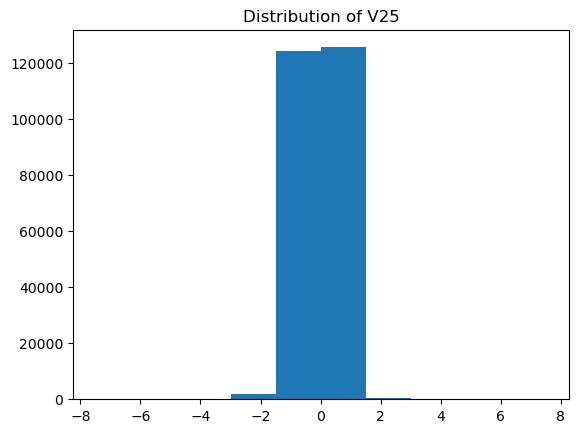

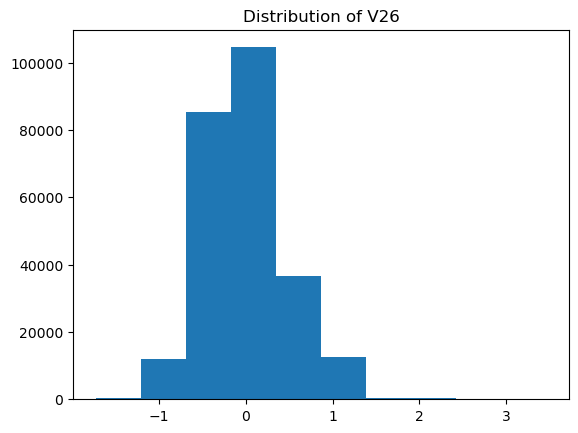

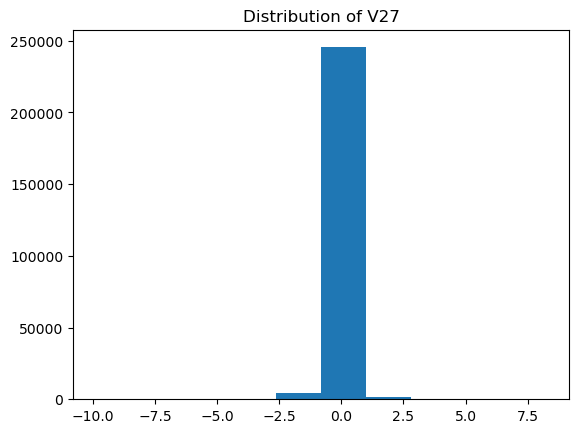

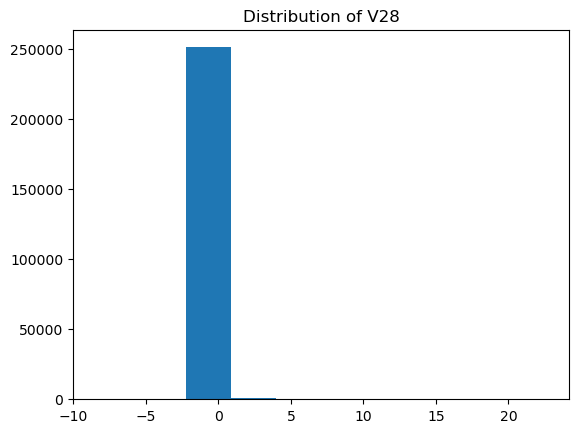

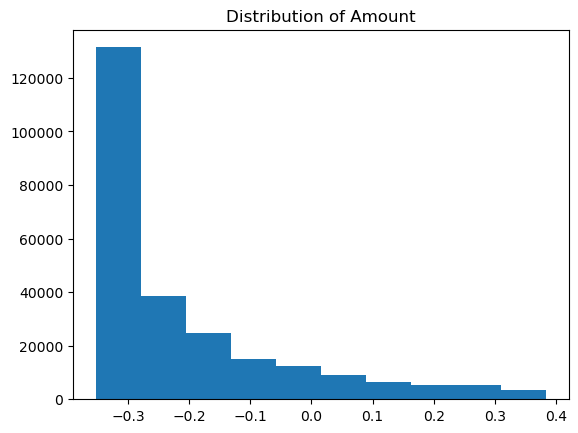


Performing Bivariate Analysis:


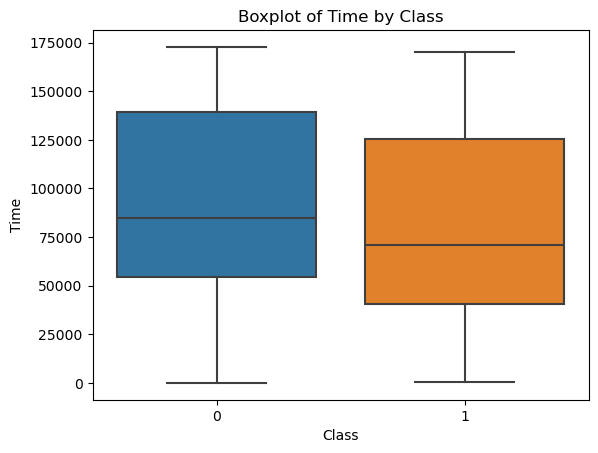

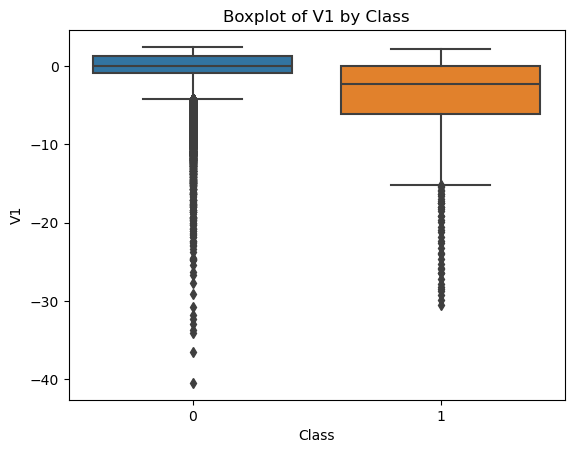

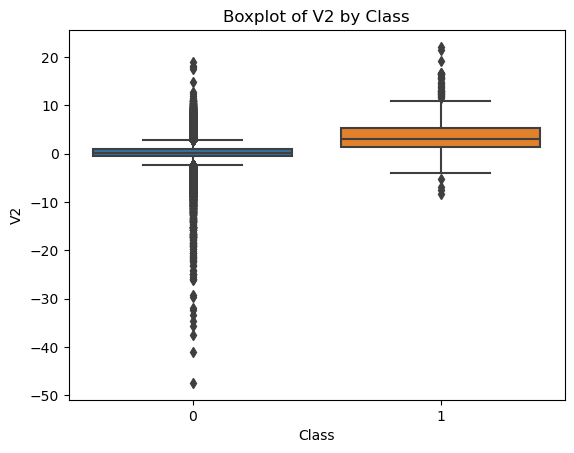

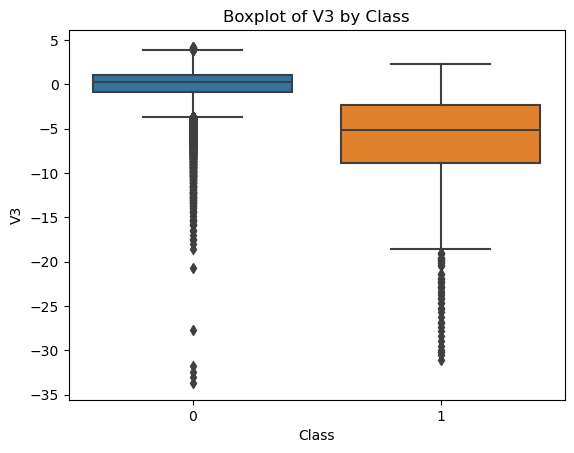

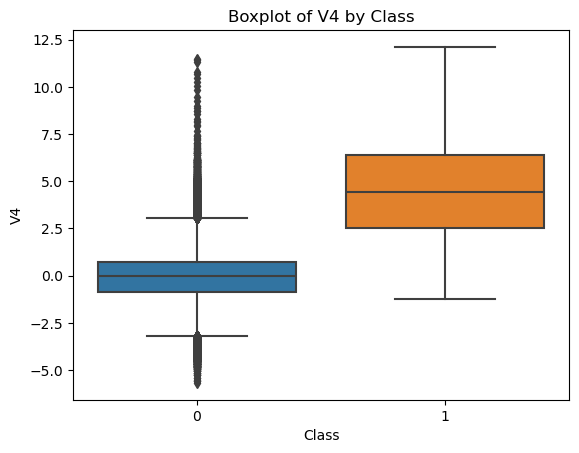

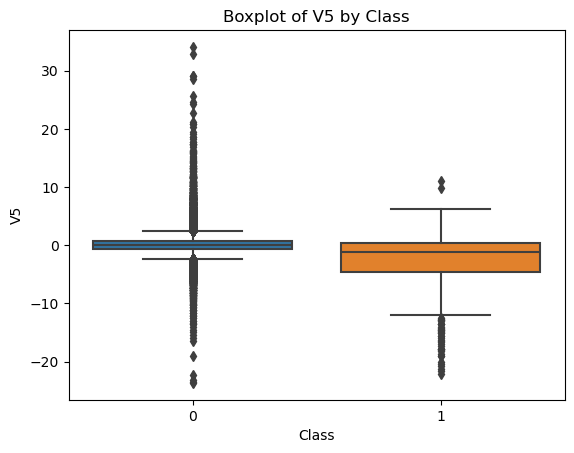

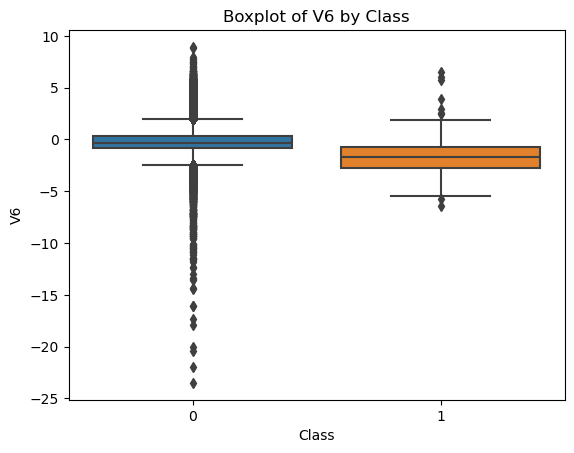

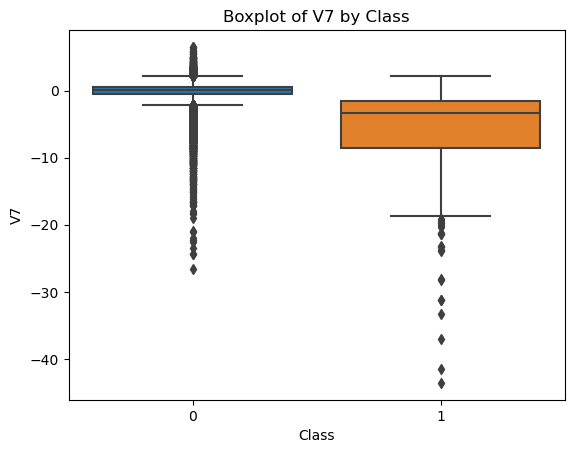

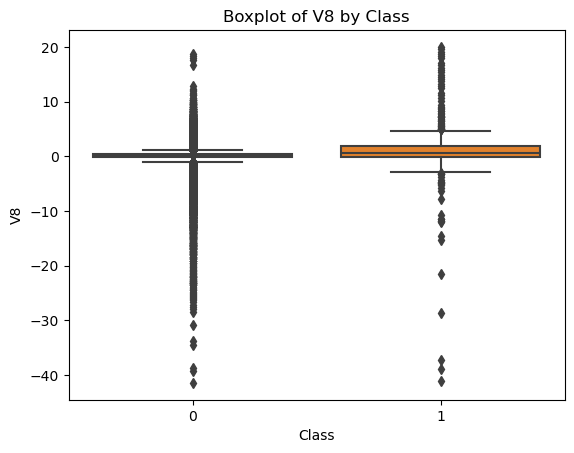

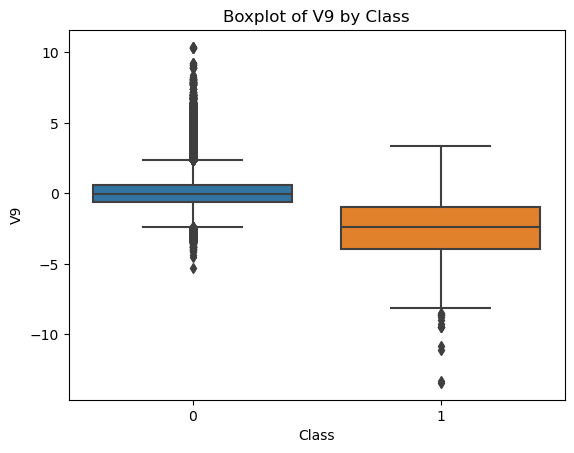

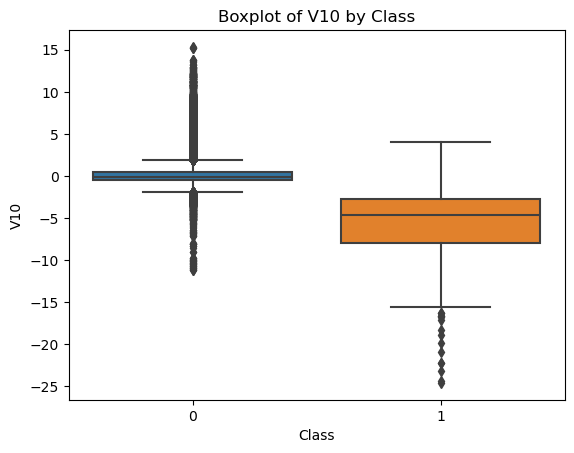

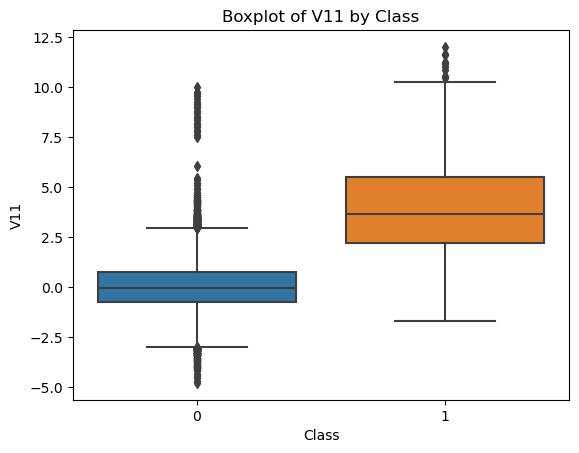

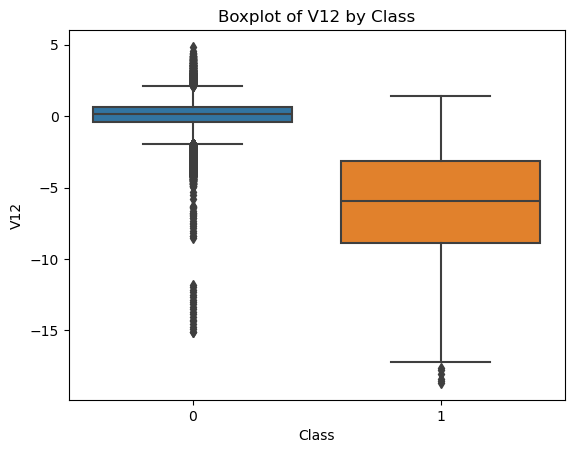

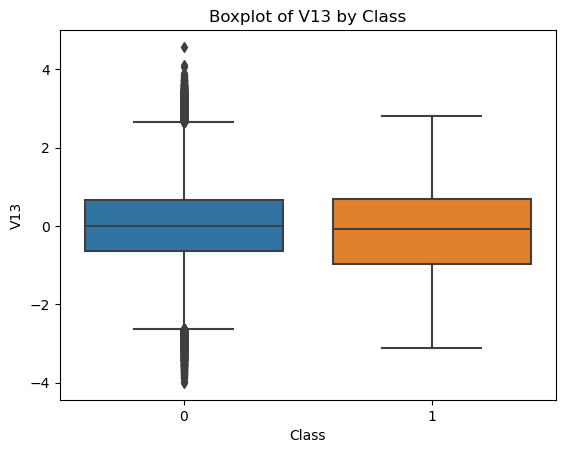

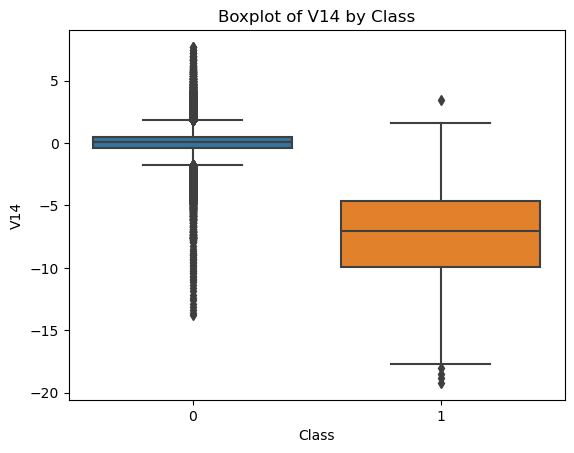

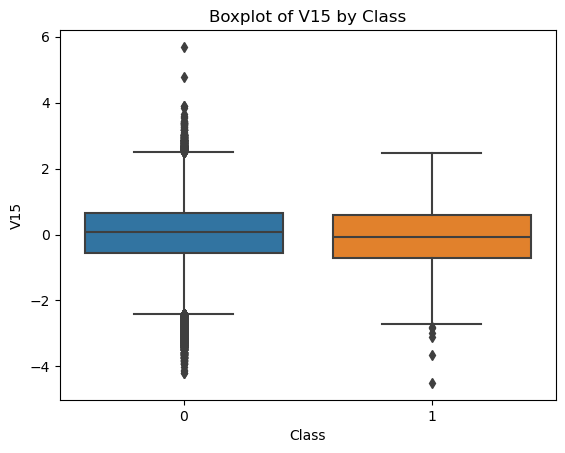

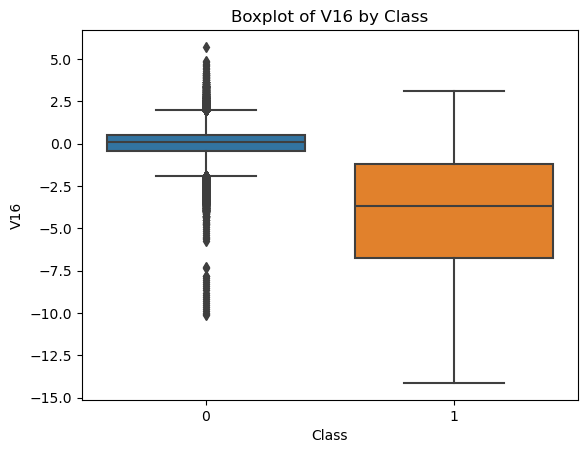

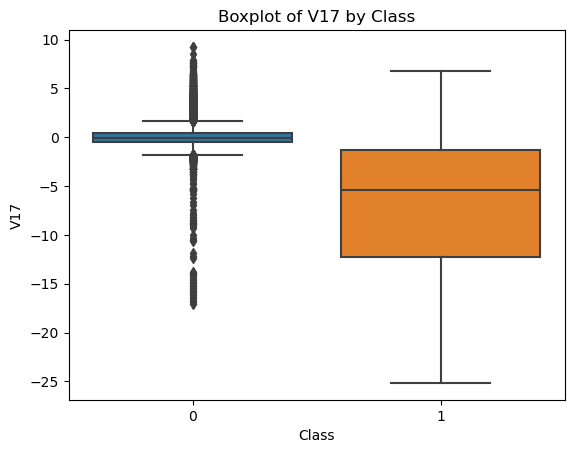

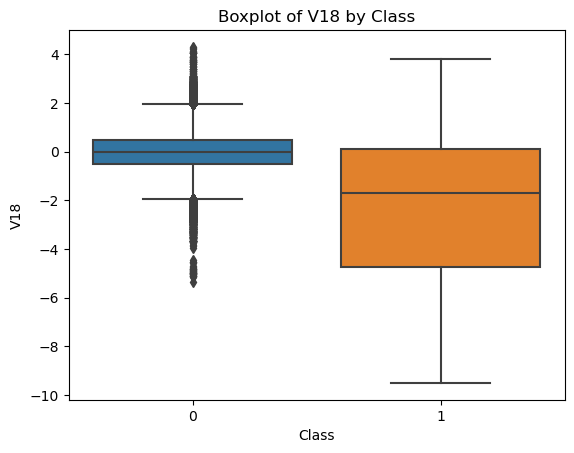

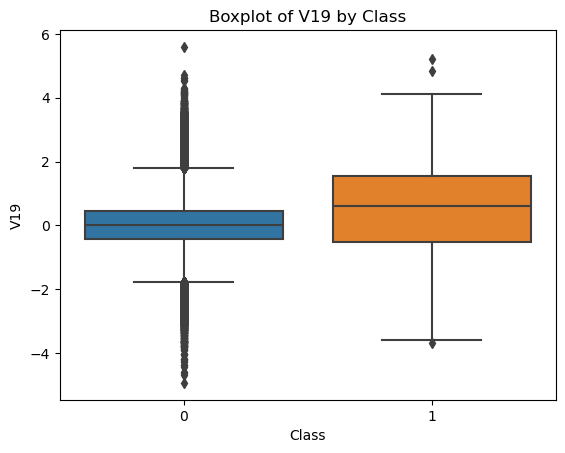

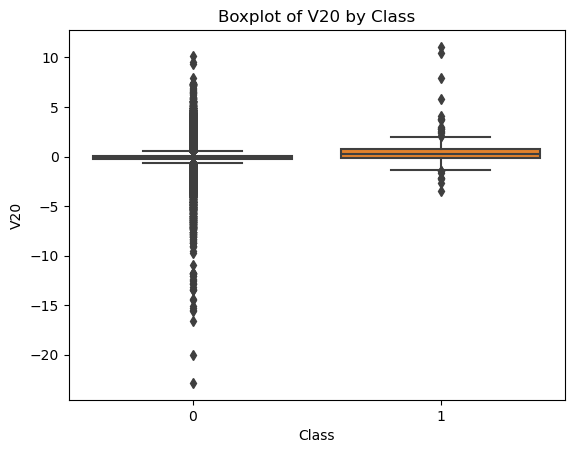

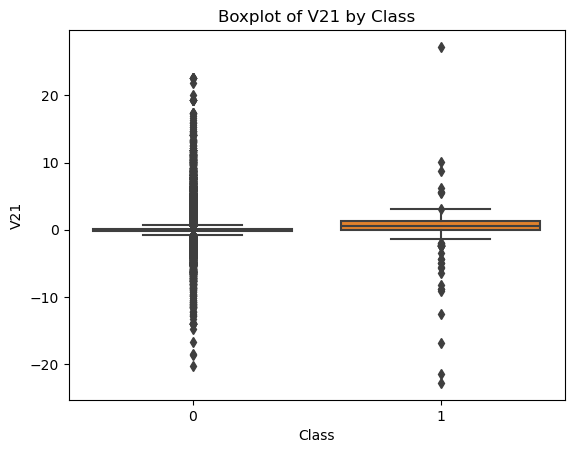

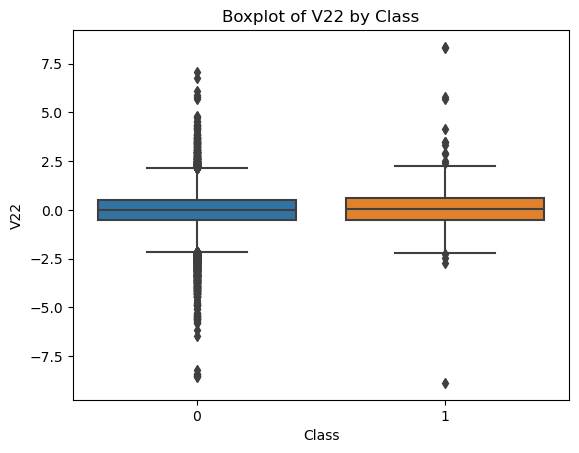

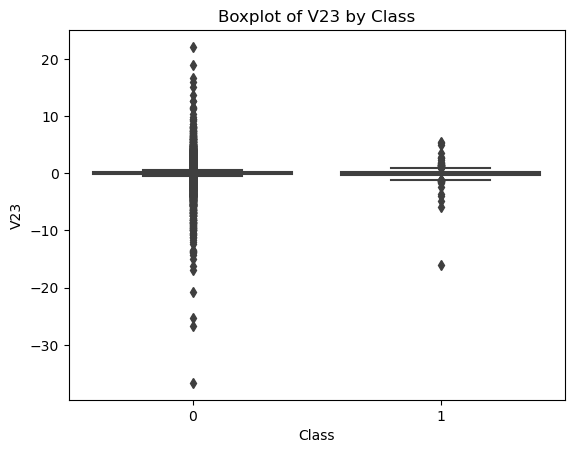

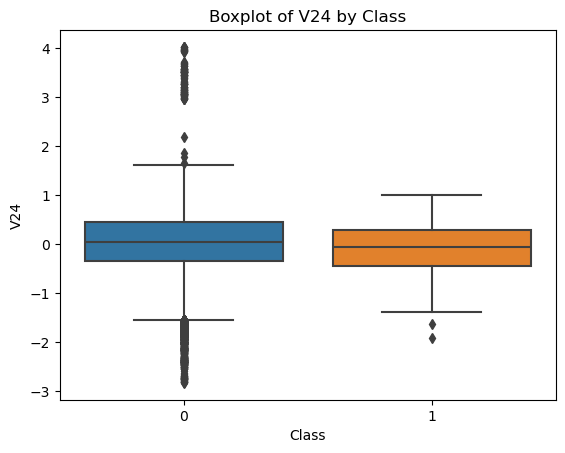

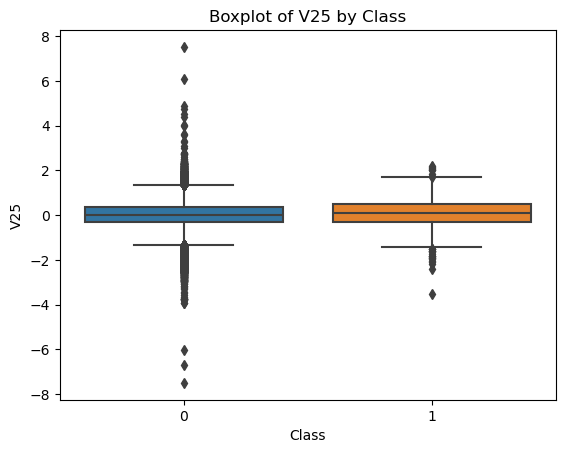

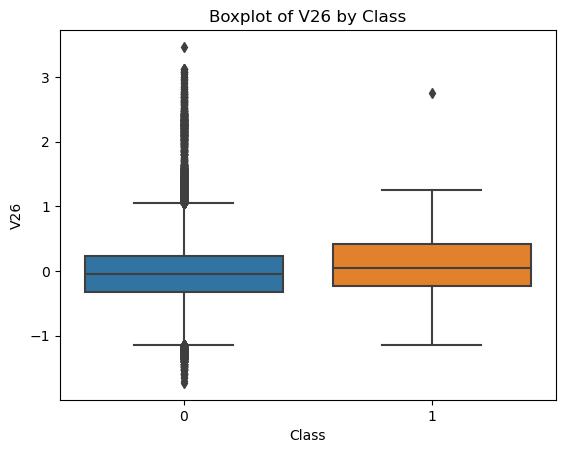

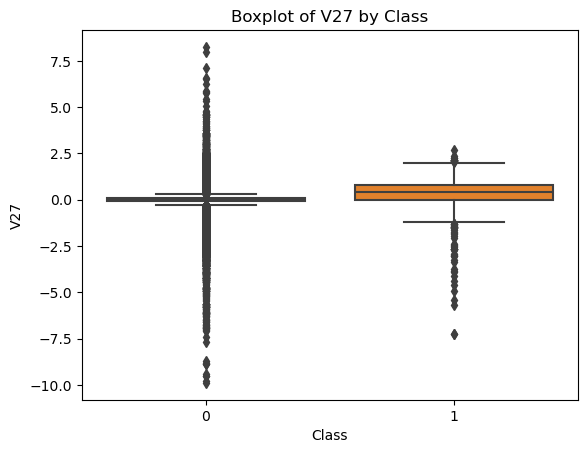

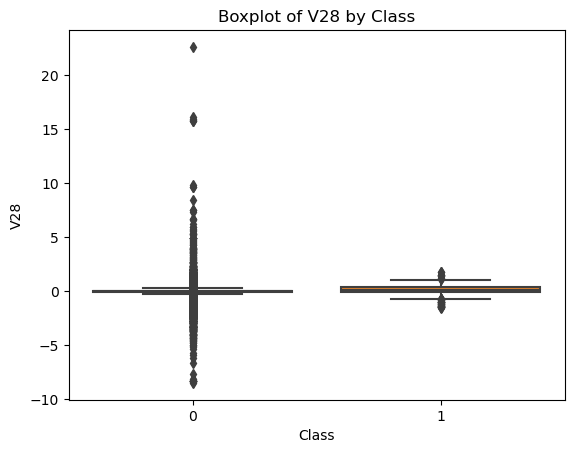

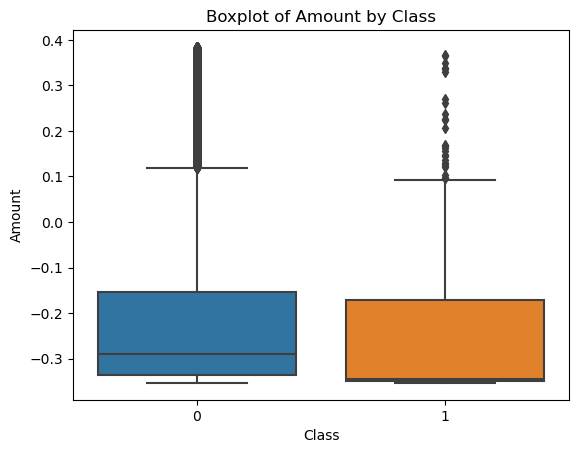

In [22]:

# Call the EDA function
perform_eda(data)

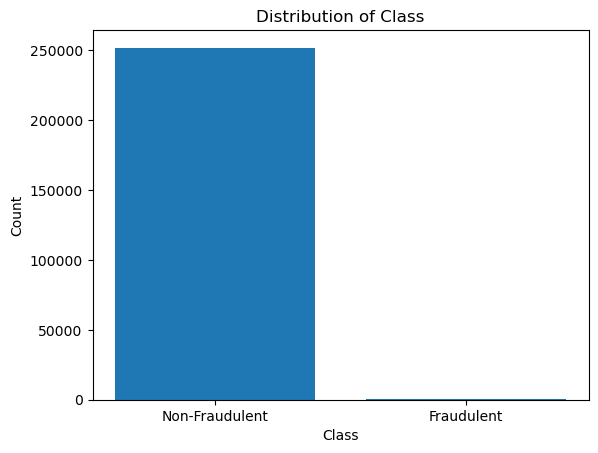

In [23]:
# Count the number of fraudulent and non-fraudulent transactions
class_counts = data['Class'].value_counts()

# Plotting the distribution using a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.xticks(class_counts.index, labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [28]:
# Count the number of fraudulent and non-fraudulent transactions
class_counts = data['Class'].value_counts()

# Print the distribution of class
for class_label, count in class_counts.items():
    if class_label == 0:
        print("Non-Fraudulent:", count)
    else:
        print("Fraudulent:", count)

Non-Fraudulent: 251691
Fraudulent: 391


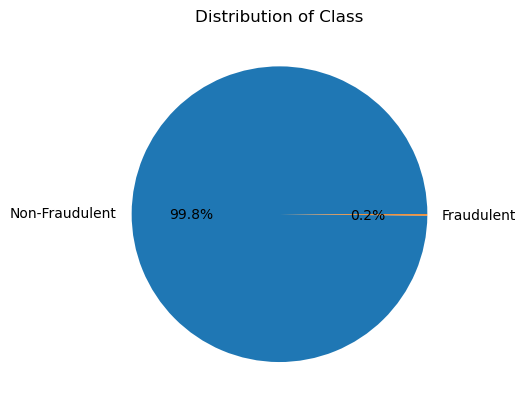

In [24]:
# Plotting the distribution using a pie chart
plt.pie(class_counts.values, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%')
plt.title('Distribution of Class')
plt.show()

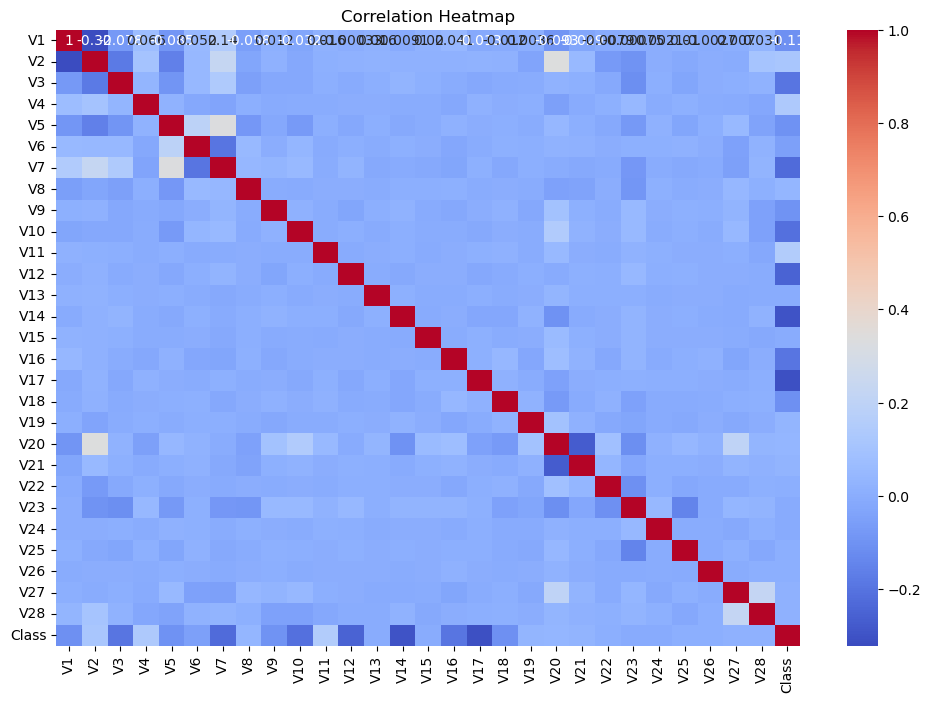

In [25]:
# Correlation Heatmap
correlation_matrix = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

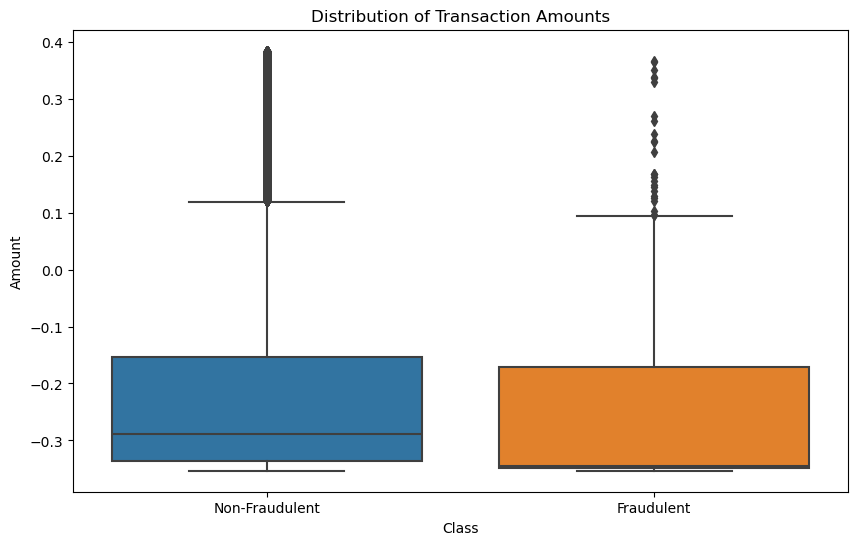

In [26]:
# Amount vs. Class - Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Class'], y=data['Amount'])
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts')
plt.xticks([0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

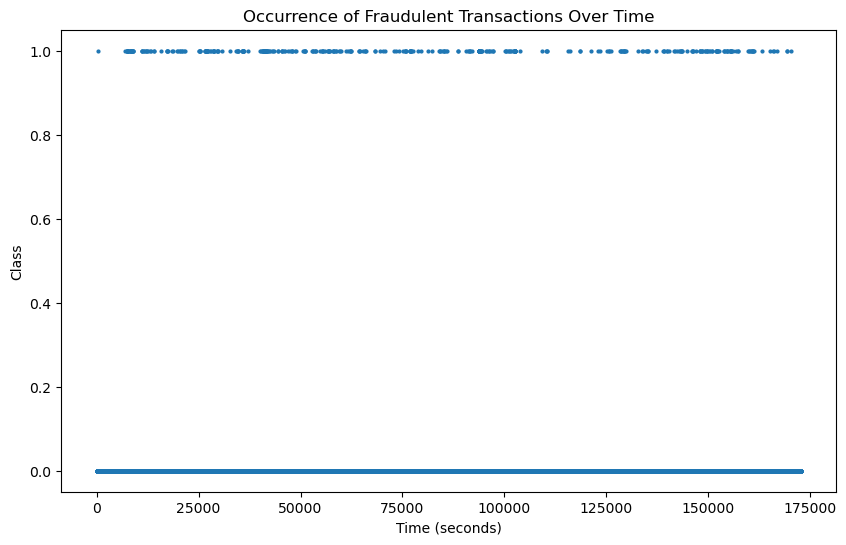

In [27]:
# Time vs. Class - Line chart
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Class'], 'o', markersize=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Class')
plt.title('Occurrence of Fraudulent Transactions Over Time')
plt.show()